# CO542 - Neural Networks and Fuzzy Systems
## E/19/129 - K.H. Gunawardana

### Lab 08: Fuzzy sets and membership functions

Input Speed: 2437.4 RPM
Output Voltage (scikit-fuzzy centroid method): 2.378 V


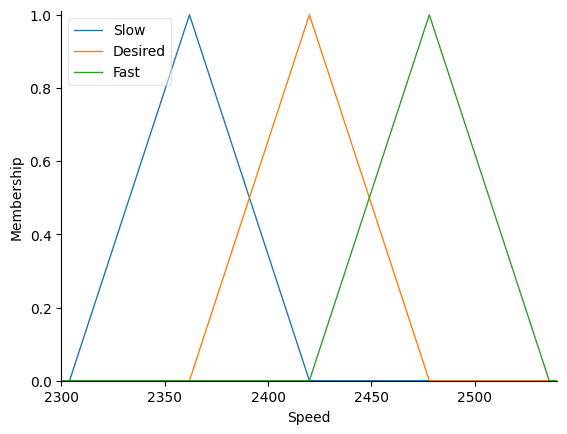

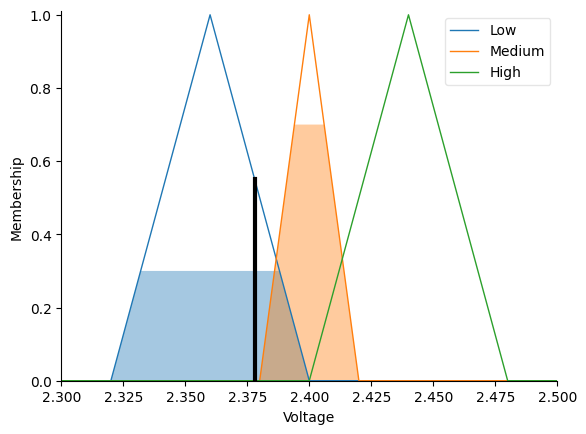

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# --- Define fuzzy variables with appropriate ranges ---
speed = ctrl.Antecedent(np.arange(2300, 2540, 0.1), 'Speed')       # from 2300 to 2536
voltage = ctrl.Consequent(np.arange(2.3, 2.5, 0.001), 'Voltage')   # from 2.32 to 2.48

# --- Define Input Membership Functions ---
speed['Slow'] = fuzz.trimf(speed.universe, [2304, 2362, 2420])
speed['Desired'] = fuzz.trimf(speed.universe, [2362, 2420, 2478])
speed['Fast'] = fuzz.trimf(speed.universe, [2420, 2478, 2536])

# --- Define Output Membership Functions ---
voltage['Low'] = fuzz.trimf(voltage.universe, [2.32, 2.36, 2.40])
voltage['Medium'] = fuzz.trimf(voltage.universe, [2.38, 2.40, 2.42])
voltage['High'] = fuzz.trimf(voltage.universe, [2.40, 2.44, 2.48])

# --- Define Fuzzy Rules ---
rule1 = ctrl.Rule(speed['Slow'], voltage['High'])       # Rule: Slow → High Voltage
rule2 = ctrl.Rule(speed['Desired'], voltage['Medium'])  # Rule: Desired → Medium Voltage
rule3 = ctrl.Rule(speed['Fast'], voltage['Low'])        # Rule: Fast → Low Voltage

# --- Create control system and simulation ---
speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(speed_ctrl)

# --- Provide input speed value ---
sim.input['Speed'] = 2437.4
sim.compute()

# --- Get and print output voltage ---
output_voltage = sim.output['Voltage']
print(f"Input Speed: 2437.4 RPM")
print(f"Output Voltage (scikit-fuzzy centroid method): {output_voltage:.3f} V")

# --- Optional: Visualize membership functions and result ---
# Input Memberships
speed.view()

# Output Memberships with result
voltage.view(sim=sim)